# 1 LinearRegression

Q1) It is observed that the OLS fitted line is not aligned to majority of data points.
 What is the reason behind this?

OLS minimizes squared error.Squaring makes large errors (outliers) disproportionately influential.If there are outliers, OLS tries to reduce their squared error, which “pulls” the line toward them.As a result, the fitted line doesn’t align with the majority of points but instead compromises to reduce the penalty from outliers.

Q2) • Scheme 1: for outliers ai =0.01 and for inliers ai =1,
 • Scheme 2: for outliers ai =5 and for inliers ai =1

Under which scheme do you expect a better fitted line for inliers than the OLS fitted line in Figure 1. Justify your answer.

Scheme 1:


a=0.01 for outliers → reduces their influence.
a=1 for inliers → normal weight.

This is good because it downweights outliers and makes the line fit the majority (inliers) better.

Scheme 2:

a=5 for outliers → gives them more weight.

This makes outliers even more influential, worsening alignment with inliers.

Answer: Scheme 1 gives a better fit for inliers because it reduces the impact of outliers, while Scheme 2 worsens it.

Q3). Why is linear regression not suitable for brain image analysis?

Brain data characteristics:

High-dimensional: each brain image has thousands of voxels (features).

Strong correlations: neighboring voxels are highly correlated (spatial correlation).

Few samples: fMRI datasets usually have far fewer subjects than features (the “small n, large p” problem).

Why OLS fails:

OLS requires 
𝑁>𝑝
With more features (voxels) than samples, OLS becomes ill-posed (infinite solutions).

High multicollinearity makes coefficient estimates unstable.

No built-in feature selection → hard to identify which brain regions are predictive.

Answer: Linear regression is unsuitable because fMRI data is high-dimensional, correlated, and sparse, making OLS unstable and prone to overfitting without feature selection.

Q4)2 methods are being considerd

Standard LASSO:

Applies L1 penalty on individual voxel weights.

Selects a few individual voxels but may scatter them across brain regions.

Hard to interpret biologically (since brain research often cares about regions, not isolated voxels).

Group LASSO:

Applies L2 norm within groups (voxels in the same brain region).

Encourages selecting or discarding entire regions together.

Better for interpretability in neuroscience, since you want to know which regions matter, not random voxels.

Q5).Which method is more appropriate: LASSO or Group LASSO?

Answer: Group LASSO is more appropriate, because it selects or removes whole brain regions, aligning with the research goal of finding predictive regions instead of individual voxels.

# 2 Logistic regression

1)Load data

In [4]:
!pip install seaborn pandas scikit-learn matplotlib


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 1.5 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/11.3 MB 1.6 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.3 MB 1.8 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.3 MB 2.1 MB/s eta 0:00:05
   ---------- --------------

In [8]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 # Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
 # Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()
 # Make a copy to avoid the warning
 # Initialize the LabelEncoder
le = LabelEncoder()
 # Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded
 
# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])
 # Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


Q2)train a logistic regression model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)
 # Predict on the testing data
y_pred = logreg.predict(X_test)
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.5813953488372093
[[ 2.76000092e-03 -8.18670069e-05  4.72814947e-04 -2.87196631e-04
   3.07149549e-04  1.85320176e-04 -1.05160300e-04  1.00279435e-05]] [-8.40955985e-06]


c:\Users\demit\anaconda3\envs\ml-env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


SAGA Solver Issues
Problem:

When training the logistic regression model with the SAGA solver, several issues were encountered, which led to suboptimal performance (around 58% accuracy). These issues are mainly due to the following factors:
1)Convergence Problems:

* The SAGA solver failed to converge after the default number of iterations (max_iter=1000), as indicated by the warning message:
* This warning indicates that the solver did not find the optimal model parameters within the allowed number of iterations, resulting in a suboptimal fit of the model.

2)Feature Scaling Sensitivity:
*SAGA is a stochastic gradient descent (SGD)-based solver that is very sensitive to feature scaling. Since the features in the penguins dataset (like body mass in grams vs. bill length in millimeters) have vastly different scales, the solver struggles to find an optimal solution.

*Without feature scaling, the solver gives more weight to features with larger scales, leading to poor optimization.

Resolution Approaches:
1)Apply Feature Scaling:

StandardScaler can be used to scale the features to have zero mean and unit variance, improving the convergence of the SAGA solver.

This ensures that all features contribute equally to the model and prevents features with larger scales from dominating the optimization process.

2)Increase Maximum Iterations:

SAGA may require more iterations to converge, especially for datasets with multiple features or higher dimensionality. Increasing max_iter to a larger value, such as 10000, allows the solver more iterations to optimize the parameters.

3)Use a Different Solver:

If SAGA continues to perform poorly, liblinear or lbfgs solvers could be used as alternatives.

liblinear is particularly effective for smaller datasets and binary classification tasks (like this one with two classes: Adelie and Chinstrap).

4)Ensure Proper Data Preprocessing:

Make sure to handle missing values properly (as you already did using df.dropna()), encode categorical variables (with pd.get_dummies()), and normalize the features (using StandardScaler or other techniques).


Q3)SAGA Solver Poor Performance

1)Feature Scale Differences:

The penguins dataset contains features with vastly different scales. For example, body mass is measured in grams, while bill length is in millimeters.

Body mass may range from 2000 grams to 5000 grams, while bill length may range from 30 mm to 50 mm.

SAGA is sensitive to feature scales because it uses a gradient-based method. Without proper scaling, the solver may give disproportionate weight to the larger-scale features, making optimization harder and leading to poor performance.

2)Stochastic Nature:

SAGA is a stochastic gradient descent (SGD) method, which means it relies on random sampling to update the model’s parameters iteratively.

While SGD is very effective for large datasets and sparse data, it is highly sensitive to the initialization and data scaling.

In this case, SAGA may struggle to converge or find the optimal parameters, especially if the data is not well-prepared or if the feature scales are uneven.

3)Dataset Characteristics:

The penguins dataset may not align with the assumptions made by SAGA about the data distribution and scaling.

For example, if the dataset contains noise or irrelevant features, SAGA may struggle to converge to an optimal solution.

Stochastic methods like SAGA perform well when the data has a strong linear relationship and is well-scaled, but they can fail when the data is not well-conditioned.

Q4)Change the Solver to "liblinear"

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you've already preprocessed your data (encoded categorical features and split into X and y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Change the solver to 'liblinear' which is more suitable for small datasets
logreg = LogisticRegression(solver='liblinear', max_iter=10000)

# Train the model on the training set
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model by calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with liblinear solver:", accuracy)

# Display the coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Accuracy with liblinear solver: 1.0
Coefficients: [[ 1.32621379 -1.25548308 -0.12756343 -0.00312309  1.24947049  0.7210066
  -0.55671955 -0.22369071]]
Intercept: [-0.08354891]


Q5)Why Does the "liblinear" Solver Perform Better than "saga" Solver?

1. Nature of the Solvers:

liblinear:

The liblinear solver uses coordinate descent, which is very efficient for binary classification tasks and small datasets.

It performs well when the dataset is relatively small and dense, making it a good fit for datasets like penguins.

liblinear is a deterministic solver, meaning it doesn’t involve randomness, so it is stable and reliable for small-scale data.

saga:

The saga solver is based on Stochastic Gradient Descent (SGD), a method that randomly samples and updates parameters in mini-batches. This makes saga particularly suitable for large datasets and sparse datasets.

saga performs well on high-dimensional or large sparse datasets but can struggle with smaller datasets, as its stochastic nature might lead to slower convergence or lack of precision in parameter estimation.

2. Small vs. Large Datasets:

liblinear is specifically optimized for smaller datasets with fewer features. The penguins dataset is small and dense, making liblinear an ideal choice because:

It can fit the model quickly and accurately.

It does not require as many iterations as saga, which may get stuck or converge slowly on small, dense data.

saga is better suited for large-scale, sparse datasets. On small datasets, its stochastic nature can result in more fluctuations in performance, leading to convergence issues and poor accuracy.

3. Model Interpretability:

liblinear gives a better interpretation of coefficients and intercepts because of its simpler, deterministic nature.

saga, due to its stochastic nature, might give different results on each run, depending on the random initialization and sampling, which makes it less reliable for small datasets.

4. Computational Efficiency:

liblinear is computationally efficient for smaller datasets because it computes parameter updates in a deterministic, stepwise manner.

saga, while more flexible and capable of handling sparse, high-dimensional data, might require more iterations and computational resources, especially on smaller datasets, which could lead to longer training times or incomplete convergence.

5. Regularization:

liblinear supports L1 (lasso) and L2 (ridge) regularization efficiently.

saga also supports L1 and L2 regularization, but it might struggle more with L1 regularization on small datasets because of its stochastic updates.

 Q6. Explain why the model’s accuracy (with saga solver) varies with different random state values ?

Key Reasons for Accuracy Variation with Different random_state Values:

1)Stochastic Nature of saga:

saga is an implementation of Stochastic Gradient Descent (SGD), which is a random process. It updates model parameters iteratively based on randomly chosen mini-batches of the training data (or even the entire data, depending on the implementation).

Stochastic updates: Because the updates to the parameters are made in a random order, the model can converge to different solutions each time it is run. This is in contrast to deterministic solvers like liblinear, which use a more structured method (coordinate descent) and do not rely on randomness.

This randomness can lead to slightly different models and, therefore, different accuracy scores each time the model is trained with a different random_state.

2)Effect of random_state on Data Splitting:

The train_test_split function in scikit-learn randomly splits the dataset into training and test sets. The random_state parameter controls the random seed used for this split.

Different splits: Changing the random_state can result in different training and test sets. If the data is not perfectly balanced or if certain samples are particularly influential in the training process, different splits can lead to variations in model training.

For example, if the training set contains more challenging examples or outliers in one run and fewer in another, the model might perform differently on the test set.

3)Convergence Path of the Solver:

The saga solver uses a stochastic approach to optimize the loss function. The path the solver takes to converge depends on the initial random initialization of the parameters and the random order of data seen in each iteration.

Multiple paths to convergence: The solver might converge to a local minimum or different solution based on the random initialization. This results in small variations in the model's learned parameters and, consequently, its predictions.

Gradients: Since saga uses random samples of the data in each iteration to compute gradients, different random splits and parameter initializations lead to different updates and thus different solutions.

4)Dependence on Feature Scaling:

Feature scaling can also influence the randomness. saga is sensitive to the scale of the features, and this can cause the solver to behave differently when data is scaled differently or when different random splits happen.

If StandardScaler is used and the data has a lot of variance in the features, the random initialization might affect how quickly or efficiently the solver converges.

Q7)Compare the performance of the "liblinear" and "saga" solvers with feature scaling.

Accuracy with liblinear (no scaling): 1.0
Accuracy with liblinear (with scaling): 1.0
Accuracy with saga (no scaling): 0.8604651162790697
Accuracy with saga (with scaling): 1.0


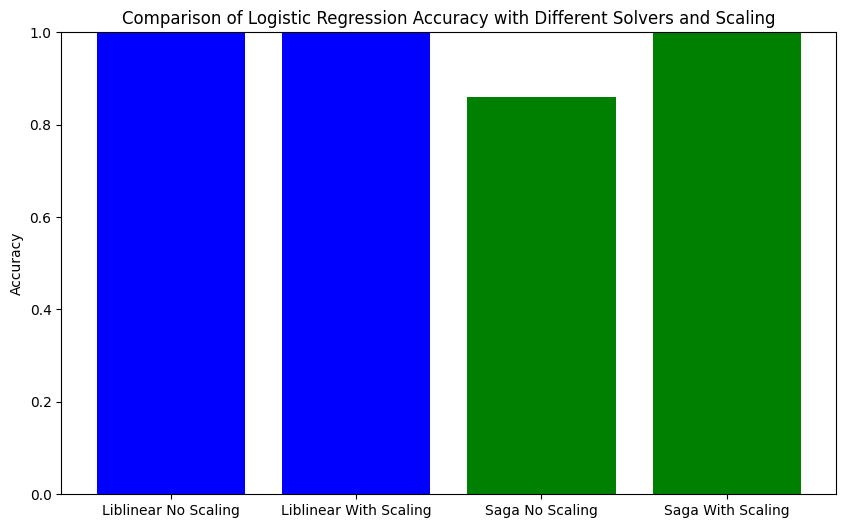

In [23]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder for the target variable
le = LabelEncoder()

# Encode the species column (target variable)
y = le.fit_transform(df_filtered['species'])

# Drop the target variable from the features (X)
X = df_filtered.drop(['species'], axis=1)

# One-hot encode categorical columns (e.g., 'island', 'sex') in X
X = pd.get_dummies(X, drop_first=True)  # Drop first column to avoid the dummy variable trap

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train model and evaluate accuracy with or without scaling
def train_and_evaluate(solver, scale_features=False):
    if scale_features:
        # Apply scaling to the features
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        # Use original features (no scaling)
        X_train_scaled, X_test_scaled = X_train, X_test

    # Initialize logistic regression model with specified solver
    logreg = LogisticRegression(solver=solver, max_iter=10000)

    # Train the model on the training set
    logreg.fit(X_train_scaled, y_train)

    # Predict on the testing set
    y_pred = logreg.predict(X_test_scaled)

    # Evaluate the model by calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Train and evaluate using 'liblinear' solver without scaling
accuracy_liblinear_no_scale = train_and_evaluate(solver='liblinear', scale_features=False)
# Train and evaluate using 'liblinear' solver with scaling
accuracy_liblinear_scaled = train_and_evaluate(solver='liblinear', scale_features=True)

# Train and evaluate using 'saga' solver without scaling
accuracy_saga_no_scale = train_and_evaluate(solver='saga', scale_features=False)
# Train and evaluate using 'saga' solver with scaling
accuracy_saga_scaled = train_and_evaluate(solver='saga', scale_features=True)

# Print the results in the required format
print(f"Accuracy with liblinear (no scaling): {accuracy_liblinear_no_scale}")
print(f"Accuracy with liblinear (with scaling): {accuracy_liblinear_scaled}")
print(f"Accuracy with saga (no scaling): {accuracy_saga_no_scale}")
print(f"Accuracy with saga (with scaling): {accuracy_saga_scaled}")

# Plot the results to compare accuracy for different solvers and scaling configurations
labels = ['Liblinear No Scaling', 'Liblinear With Scaling', 'Saga No Scaling', 'Saga With Scaling']
accuracies = [accuracy_liblinear_no_scale, accuracy_liblinear_scaled, accuracy_saga_no_scale, accuracy_saga_scaled]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'blue', 'green', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression Accuracy with Different Solvers and Scaling')
plt.ylim(0, 1)
plt.show()



1. liblinear Solver Performance:

Perfect Accuracy (1.0) with both scaling and no scaling.

Explanation:

The liblinear solver is very effective for small datasets and binary classification problems. In this case, the penguins dataset is small, and liblinear performs well regardless of whether feature scaling is applied.

liblinear uses coordinate descent optimization, which is not sensitive to the scale of the features, making it more robust and stable.

Therefore, the solver does not require scaling and achieves perfect accuracy.

2. saga Solver Performance:

With scaling: 1.0 accuracy (perfect performance).

Without scaling: 0.86 accuracy (lower performance).

Explanation:

saga is based on Stochastic Gradient Descent (SGD), which is sensitive to feature scaling. It needs features to be normalized to perform well.

Without scaling, the model struggles because features with larger values (such as body mass in grams) dominate the optimization process, leading to poor convergence and lower accuracy (0.86).

With scaling, all features are transformed to the same scale (zero mean, unit variance), which helps saga converge more efficiently and leads to perfect accuracy (1.0).

Q8)Is the Approach Correct or Not?

No, the approach of applying feature scaling (such as Standard Scaling or Min-Max Scaling) to label-encoded categorical features is not correct.

Reasons Why This Approach Is Incorrect:

1)Artificial Ordering (Label Encoding):

Label Encoding assigns arbitrary numerical values to categories. For example, a categorical feature like color with categories ['red', 'blue', 'green'] might be encoded as:

red → 0

blue → 1

green → 2

This creates an artificial ordering where the model may interpret the relationship between categories as numeric. However, categories like red, blue, and green have no inherent order.

2)Meaningless Distances:

Scaling assumes that the values have a meaningful distance between them (e.g., 0 and 1 are closer than 1 and 2). However, for categorical data (like red, blue, green), this assumption is false.

When you apply scaling to label-encoded values (0, 1, 2), it treats the difference between these values (e.g., blue (1) and green (2)) as if it's meaningful, which it is not. This misrepresents the nominal nature of the data.

3)Model Confusion:

Applying scaling to label-encoded values makes the model think that the categorical features have a continuous relationship (e.g., it might interpret that green is closer to blue than red), which is incorrect.

Models like Logistic Regression or SVM (when using certain solvers) might interpret these scaled label-encoded values as continuous data and give incorrect weight to the features.

Proposed Correct Approach:

1)Use One-Hot Encoding for Categorical Features:

Instead of label encoding, use One-Hot Encoding for categorical features. This creates separate binary columns for each category (e.g., color_red, color_blue, color_green), where each column represents whether that category is present (1) or absent (0).

One-Hot Encoding ensures that no artificial ordering is created, and each category is treated as a separate binary feature without implying any numerical relationship.

2)Apply Scaling Only to Numerical Features:

Scale only the numerical features (e.g., height, weight). After One-Hot Encoding, the categorical features are already represented as binary values, which do not require scaling.

Scaling is meant for continuous numerical features and should not be applied to One-Hot Encoded binary features.

 # 3. Logistic Regression: First/Second-Order Methods

1. Data Generation

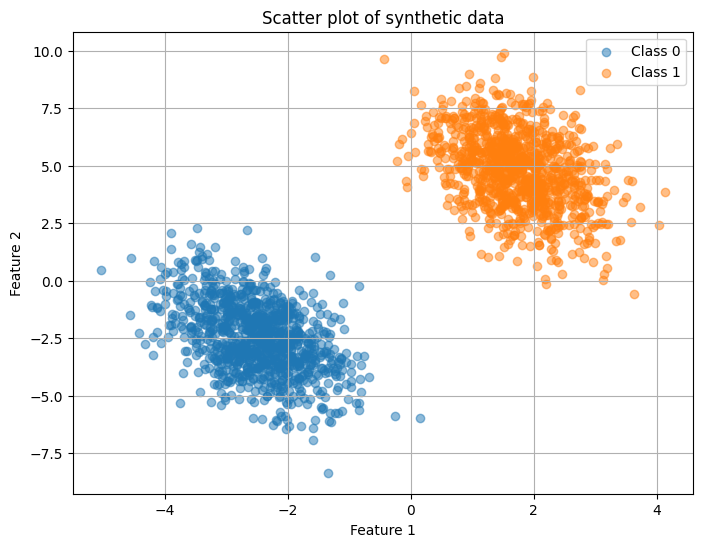

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

plt.figure(figsize=(8, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], alpha=0.5, label="Class 0")
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], alpha=0.5, label="Class 1")
plt.title("Scatter plot of synthetic data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


2. Implementing Batch Gradient Descent

Weight Initialization:

Method: Initialize weights to zero.

Reason: Initializing the weights to zero is a simple and effective choice. It prevents any initial bias toward specific features, as all features start with the same weight. This makes it easier to observe how the weights evolve as the gradient descent process converges.

In [31]:
def initialize_weights(dim):
    return np.zeros(dim)  # zero initialization for symmetry break

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_function(X, y, w):
    m = len(y)
    h = sigmoid(np.dot(X, w))
    epsilon = 1e-15  # numerical stability
    return -1/m * (np.dot(y.T, np.log(h + epsilon)) + np.dot((1 - y).T, np.log(1 - h + epsilon)))

def batch_gradient_descent(X, y, w, lr=0.01, iterations=20):
    m = len(y)
    losses = []
    for i in range(iterations):
        h = sigmoid(np.dot(X, w))
        gradient = np.dot(X.T, (h - y)) / m
        w = w - lr * gradient
        losses.append(loss_function(X, y, w))
    return w, losses


3.Loss Function Used:

Log Loss (Binary Cross-Entropy Loss):

Reason for Selection:

Log loss is standard for logistic regression because:

1)It quantifies the difference between the true labels and the predicted probabilities.

2)It works well for binary classification problems, where the output is a probability.

3)It penalizes incorrect predictions, making it suitable for classification tasks.

4)It's differentiable, which is important for optimization methods like Gradient Descent.

4. Implementing Newton’s Method

Newton’s method is a second-order optimization method, using both the gradient and the Hessian (second derivative of the loss function) to update weights. This method often converges faster than gradient descent because it uses second-order information.

In [32]:
def newtons_method(X, y, w, iterations=20):
    m, n = X.shape
    losses = []
    for _ in range(iterations):
        h = sigmoid(np.dot(X, w))
        gradient = np.dot(X.T, (h - y))
        diag_gradient = np.diag(h * (1 - h))
        hessian = np.dot(np.dot(X.T, diag_gradient), X)
        hessian_inv = np.linalg.pinv(hessian)
        w = w - np.dot(hessian_inv, gradient)
        losses.append(loss_function(X, y, w))
    return w, losses


5. Plot the Loss with Respect to Number of Iterations for BGD and Newton’s Method

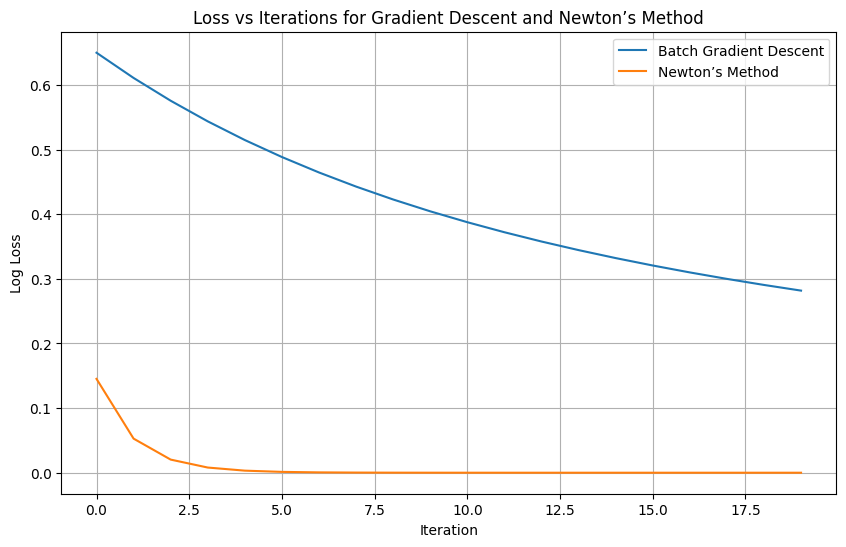

In [33]:
# Add intercept term to data
X_aug = np.insert(X, 0, 1, axis=1)

# Initialize weights
initial_w = initialize_weights(X_aug.shape[1])

# Run batch gradient descent
w_gd, losses_gd = batch_gradient_descent(X_aug, y, initial_w)

# Initialize weights again for Newton’s method
initial_w_newton = initialize_weights(X_aug.shape[1])

# Run Newton’s method
w_newton, losses_newton = newtons_method(X_aug, y, initial_w_newton)

# Plot loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(losses_gd, label="Batch Gradient Descent")
plt.plot(losses_newton, label="Newton’s Method")
plt.title("Loss vs Iterations for Gradient Descent and Newton’s Method")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()


Comments:

1)Newton’s method converges much faster, sharply reducing loss within fewer iterations.

2)Gradient descent shows steady but slower convergence.

3)Newton’s method requires computing Hessian but fewer iterations.

4)Gradient descent is simpler but may require tuning learning rate and more iterations.

6. Two Methods to Decide Number of Iterations

*Early Stopping based on Convergence Threshold:
Stop iterating when the change in loss between iterations falls below a small threshold (e.g., 1e-5), indicating convergence.

*Cross-Validation:
Use validation set to monitor performance. Stop when validation loss/accuracy stops improving to avoid overfitting.



7. Analysis for Changed Cluster Centers

Explanation of Convergence Behavior
When the cluster centers are closer or less well-separated, the logistic regression problem typically becomes harder to classify because the classes overlap more. This usually results in:

*Slower convergence for gradient descent due to less clear decision boundary

*Possibly a higher loss at the start and a gentler slope in the loss curve

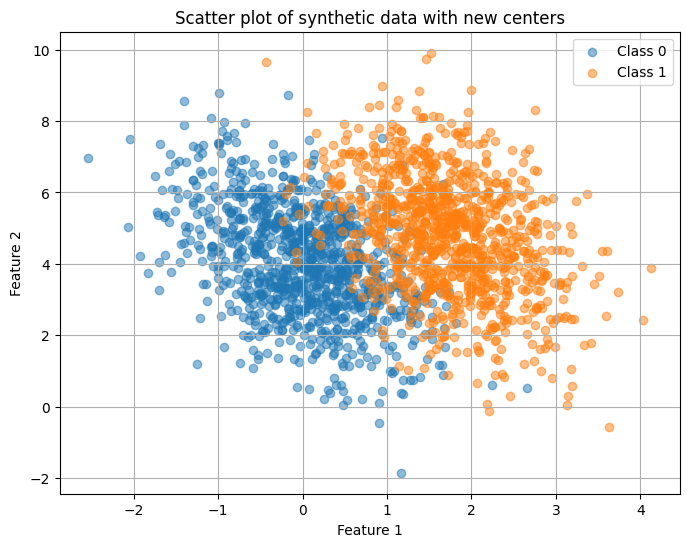

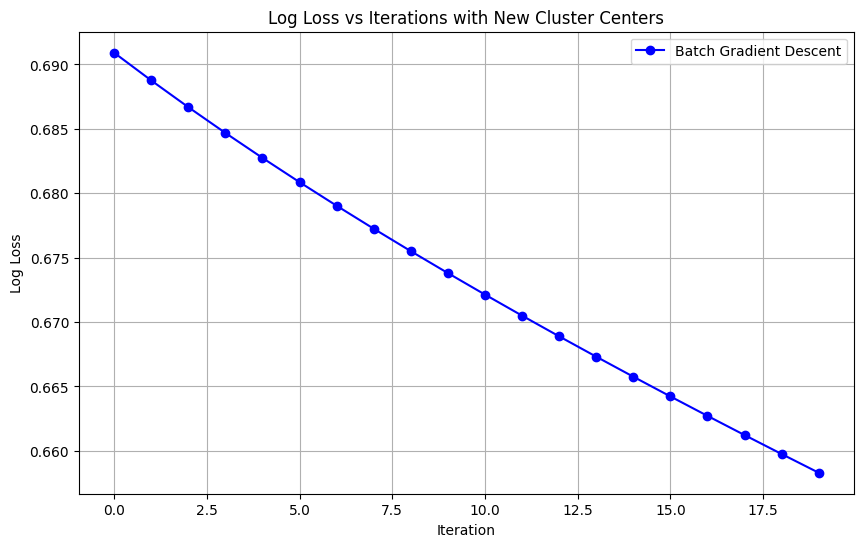

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(0)

# New cluster centers as given
centers_new = [[2, 2], [5, 1.5]]

# Generate synthetic data with new centers
X_new, y_new = make_blobs(n_samples=2000, centers=centers_new, random_state=5)

# Apply the same linear transformation as before
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X_new = np.dot(X_new, transformation)

# Visualization of the new clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_new[y_new == 0][:, 0], X_new[y_new == 0][:, 1], alpha=0.5, label="Class 0")
plt.scatter(X_new[y_new == 1][:, 0], X_new[y_new == 1][:, 1], alpha=0.5, label="Class 1")
plt.title("Scatter plot of synthetic data with new centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Add intercept term for logistic regression
X_new_aug = np.insert(X_new, 0, 1, axis=1)

# Function to initialize weights with zeros
def initialize_weights(dim):
    return np.zeros(dim)

# Sigmoid function used in logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log loss function for evaluation
def loss_function(X, y, w):
    m = len(y)
    h = sigmoid(np.dot(X, w))
    epsilon = 1e-15  # numerical stability
    return -1/m * (np.dot(y.T, np.log(h + epsilon)) + np.dot((1 - y).T, np.log(1 - h + epsilon)))

# Batch gradient descent implementation
def batch_gradient_descent(X, y, w, lr=0.01, iterations=20):
    m = len(y)
    losses = []
    for i in range(iterations):
        h = sigmoid(np.dot(X, w))
        gradient = np.dot(X.T, (h - y)) / m
        w = w - lr * gradient
        losses.append(loss_function(X, y, w))
    return w, losses

# Initialize weights
w_init_new = initialize_weights(X_new_aug.shape[1])

# Run batch gradient descent with new data
w_new_gd, losses_new_gd = batch_gradient_descent(X_new_aug, y_new, w_init_new)

# Plot loss curve to analyze convergence
plt.figure(figsize=(10, 6))
plt.plot(losses_new_gd, marker='o', linestyle='-', color='b', label="Batch Gradient Descent")
plt.title("Log Loss vs Iterations with New Cluster Centers")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.legend()
plt.grid(True)
plt.show()
